In [9]:
import os
import sys
sys.path.append("helpers")
import helpers.helpers as helpers

import datetime

from DQTools.dataset import Dataset

import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt

In [10]:
def get_data_from_datacube(product, subproduct, start, end,
                           latitude, longitude):

    keyfile = os.path.join(os.path.expanduser("~"), 'assimila_dq.txt')
    
    ds = Dataset(product=product, subproduct=subproduct,
                 key_file=keyfile)

    ds.get_data(start=start, stop=end,
                latlon=[latitude, longitude])
    
    return ds.data

def get_data_from_datacube_nesw(product, subproduct, north, east,
                                    south, west, start, end):
    
    keyfile = os.path.join(os.path.expanduser("~"), 'assimila_dq.txt')

    ds = Dataset(product=product, subproduct=subproduct,
                 key_file=keyfile)

    ds.get_data(start=start, stop=end,
                region=[north, east, south,west])

    return ds.data

## Assimila Data Cube Skin temperature data

In [11]:
product = 'era5'
subproduct = 'skt'
# defined dates in datetime instead of string
start = datetime.datetime(2019,11,1)
end = datetime.datetime(2020,1,31)
# start = '2019-11-01'
# end = '2020-01-31'

In [12]:
# Reading
lat, lon = 51.440872, -0.934287

era5_skt_reading = get_data_from_datacube(product, subproduct, start, end, lat, lon)

<IPython.core.display.Javascript object>


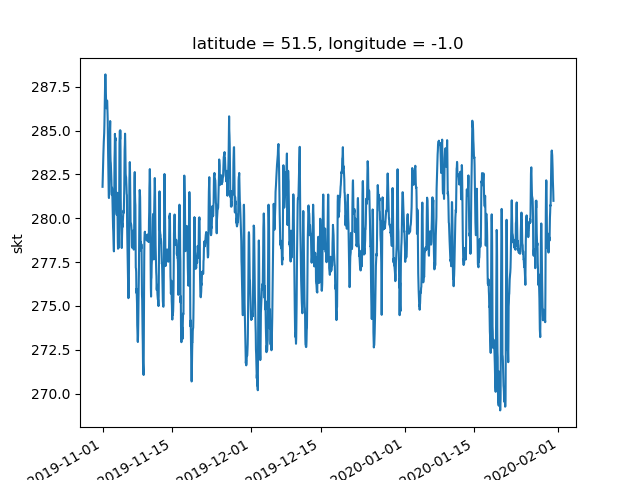

In [13]:
era5_skt_reading.skt.plot()
plt.show()

In [14]:
# Central London
lat, lon = 51.507379, -0.127623

era5_skt_london = get_data_from_datacube(product, subproduct, start, end, lat, lon)

<IPython.core.display.Javascript object>


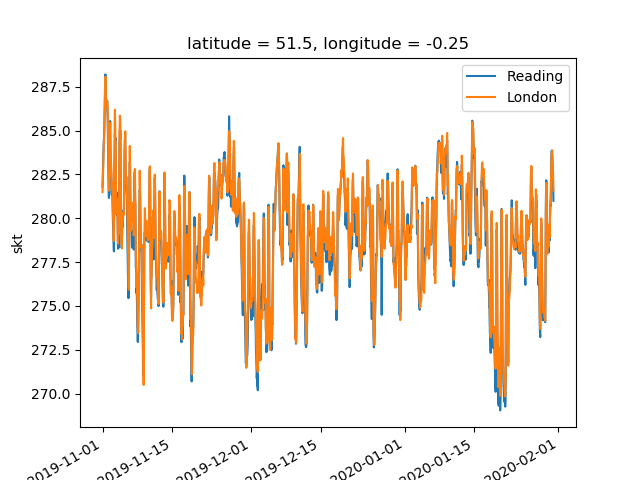

In [15]:
fig, ax = plt.subplots()

era5_skt_reading.skt.plot(ax=ax, label='Reading')
era5_skt_london.skt.plot(ax=ax, label='London')
plt.legend()
plt.show()

In [16]:
# Get spatial and temporal subset

# defined dates in datetime instead of string
# start = '2019-01-18'
# end = '2020-01-21'
start = datetime.datetime(2019,1,18)
end = datetime.datetime(2020,1,21)

ds = Dataset(product=product, subproduct=subproduct)
north, east, south, west = 60.0, 3.2, 48.5, -11.0

subset = get_data_from_datacube_nesw(product, subproduct, north, east,
                                    south, west, start, end)


<xarray.Dataset>
Dimensions:    (latitude: 47, longitude: 57, time: 8833)
Coordinates:
  * latitude   (latitude) float64 60.0 59.75 59.5 59.25 ... 49.0 48.75 48.5
  * longitude  (longitude) float64 -11.0 -10.75 -10.5 -10.25 ... 2.5 2.75 3.0
  * time       (time) datetime64[ns] 2019-01-18 ... 2020-01-21
Data variables:
    skt        (time, latitude, longitude) float32 281.84 281.81 ... 271.9
Attributes:
    transform:  [-11.125, 0.25, 0.0, 60.125, 0.0, -0.25]
    crs:        +init=epsg:4326
    res:        (0.25, 0.25)
    is_tiled:   0
    product:    era5


<IPython.core.display.Javascript object>


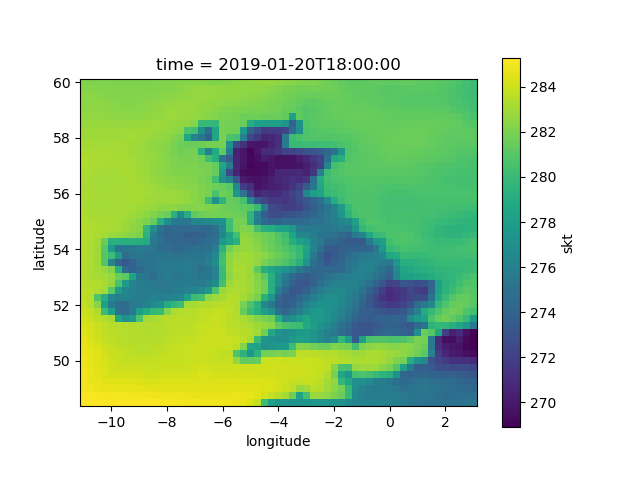

In [17]:
fig, bx = plt.subplots()

subset.skt.sel(time='2019-01-20T18:05', method='nearest').plot.imshow(ax=bx)
bx.set_aspect('equal')
plt.show()